In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install cryptography

In [2]:
import os 
from cryptography.fernet import Fernet


#### Automatic directory and file generator to test the efficency of the Encryption on 

In [3]:
# generate random files with random names and random content in the specific directory
import random
import string 
def generate_random_files(directory, number_of_files, file_size):
    for i in range(number_of_files):
        # generate random file name that ends with .txt

        file_name = ''.join(random.choice(string.ascii_lowercase) for i in range(10)) + ".txt"
        file_content = ''.join(random.choice(string.ascii_lowercase) for i in range(file_size))
        with open(os.path.join(directory, file_name), 'w') as f:
            f.write(file_content)


In [4]:
# generate directory tree 
def generate_directory_tree(path, depth, max_depth):
    if depth > max_depth:
        return
    for i in range(0, 10):
        new_path = os.path.join(path, str(i))
        os.mkdir(new_path)
        generate_directory_tree(new_path, depth + 1, max_depth)

In [5]:
# get all files in a the directory tree
def get_files(dirlist):
    files = []
    # list of files in the directory
    while len(dirlist) > 0:
        for (dirpath, dirnames, filenames) in os.walk(dirlist.pop()):
            dirlist.extend(dirnames)
            files.extend(map(lambda n: os.path.join(*n), zip([dirpath] * len(filenames), filenames)))
    # delete from the list the files that are .ipynb files
    files = list(filter(lambda f: not f.endswith('.ipynb'), files))
    # delete from the list the files that are .key files
    files = list(filter(lambda f: not f.endswith('.key'), files))
    return files

In [6]:
def get_directories(root):
    directories = []
    for root, dirs, files in os.walk(root):
        for d in dirs:
            # add the directory to the list
            directories.append(os.path.join(root, d))
    return directories


#### Run cell below only once or delete the directory created and try 

In [7]:
# test the algorithm with a random directory tree 
# run only once
test_dir = os.path.join(os.getcwd(), 'test_dir')
os.mkdir(test_dir)

In [8]:
generate_directory_tree(test_dir, 0, 3)

In [9]:
directories = get_directories('.')
directories

['.\\test_dir',
 '.\\test_dir\\0',
 '.\\test_dir\\1',
 '.\\test_dir\\2',
 '.\\test_dir\\3',
 '.\\test_dir\\4',
 '.\\test_dir\\5',
 '.\\test_dir\\6',
 '.\\test_dir\\7',
 '.\\test_dir\\8',
 '.\\test_dir\\9',
 '.\\test_dir\\0\\0',
 '.\\test_dir\\0\\1',
 '.\\test_dir\\0\\2',
 '.\\test_dir\\0\\3',
 '.\\test_dir\\0\\4',
 '.\\test_dir\\0\\5',
 '.\\test_dir\\0\\6',
 '.\\test_dir\\0\\7',
 '.\\test_dir\\0\\8',
 '.\\test_dir\\0\\9',
 '.\\test_dir\\0\\0\\0',
 '.\\test_dir\\0\\0\\1',
 '.\\test_dir\\0\\0\\2',
 '.\\test_dir\\0\\0\\3',
 '.\\test_dir\\0\\0\\4',
 '.\\test_dir\\0\\0\\5',
 '.\\test_dir\\0\\0\\6',
 '.\\test_dir\\0\\0\\7',
 '.\\test_dir\\0\\0\\8',
 '.\\test_dir\\0\\0\\9',
 '.\\test_dir\\0\\0\\0\\0',
 '.\\test_dir\\0\\0\\0\\1',
 '.\\test_dir\\0\\0\\0\\2',
 '.\\test_dir\\0\\0\\0\\3',
 '.\\test_dir\\0\\0\\0\\4',
 '.\\test_dir\\0\\0\\0\\5',
 '.\\test_dir\\0\\0\\0\\6',
 '.\\test_dir\\0\\0\\0\\7',
 '.\\test_dir\\0\\0\\0\\8',
 '.\\test_dir\\0\\0\\0\\9',
 '.\\test_dir\\0\\0\\1\\0',
 '.\\test_dir\\0

In [10]:
# use the random files to generate files and loop on the directories list
big = 20
size = 100
for directory in directories:
    generate_random_files(directory, random.randint(1, random.randint(2, big)), random.randint(1, size))


#### Great files except the script is appendid to the list

In [127]:
dirlist = ['.']
files = get_files(dirlist)
files

['.\\test_dir\\nirfthmdah',
 '.\\test_dir\\teawlgobdv',
 '.\\test_dir\\0\\atqtrjqary',
 '.\\test_dir\\0\\auuxttbtds',
 '.\\test_dir\\0\\axjqfqqrii',
 '.\\test_dir\\0\\ckweyrstvj',
 '.\\test_dir\\0\\echokwgtfd',
 '.\\test_dir\\0\\fvodwscafj',
 '.\\test_dir\\0\\kohwcvvtnw',
 '.\\test_dir\\0\\larhhmulgt',
 '.\\test_dir\\0\\pbjwpjwcze',
 '.\\test_dir\\0\\qfhcoooyjc',
 '.\\test_dir\\0\\rpgykrylmj',
 '.\\test_dir\\0\\sxwqfkdenl',
 '.\\test_dir\\0\\tlrlpxafas',
 '.\\test_dir\\0\\vcrwyxdype',
 '.\\test_dir\\0\\wluhidobpb',
 '.\\test_dir\\0\\xhxirtectw',
 '.\\test_dir\\0\\0\\dhkgtvureg',
 '.\\test_dir\\0\\0\\htuzwbhekb',
 '.\\test_dir\\0\\0\\lcxdvenbun',
 '.\\test_dir\\0\\0\\lxocexdtmg',
 '.\\test_dir\\0\\0\\ubwhtnuwrh',
 '.\\test_dir\\0\\0\\vznrzkdbdp',
 '.\\test_dir\\0\\0\\xppjtautem',
 '.\\test_dir\\0\\0\\0\\okwzyohpqk',
 '.\\test_dir\\0\\0\\0\\yqssagabzk',
 '.\\test_dir\\0\\0\\0\\0\\ebpsfdwgut',
 '.\\test_dir\\0\\0\\0\\0\\fupzbfidqy',
 '.\\test_dir\\0\\0\\0\\0\\hmabxfmtrd',
 '.\\test_dir\\0

In [128]:
# get the length of the list of files
len(files)

133284

#### The code generates everytime the pipline works a random number of files to test on 

## Warning proceed with caution.. the next cell could damage your files

#### Empirical Analysis

In [129]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import time
import numpy as np

In [130]:
# recording the time for various calls
# generating dataframe with 10000 records that contains test cases with random arrays that has max size of 10000
result_dict = { "file_path":[],"lenght":[],"key":[], "normal":[],"encrypted":[],"time_enc":[],"decrypted":[], "time_dec":[]}

for file in files:
    result_dict["file_path"].append(file)
    with open(file, 'rb') as f:
        data = f.read()
    result_dict["lenght"].append(len(data))
    result_dict["key"].append(Fernet.generate_key())
    result_dict["normal"].append(data)
    result_dict["encrypted"].append(0)
    result_dict["decrypted"].append(0)
    result_dict["time_enc"].append(0)
    result_dict["time_dec"].append(0)

In [131]:
# creating a dataframe from the result_dict
l = pd.DataFrame(result_dict)
l

,file_path,lenght,key,normal,encrypted,time_enc,decrypted,time_dec
0,.\test_dir\nirfthmdah,96,b'E1jFO2Lr7LgZdzvSuBAvOTGAgzfz1H9uNpl-yChLDPA=',b'adaeshkcyicxodvcdsdhfomjxdsmicgcgctxzyumpqza...,0,0,0,0
1,.\test_dir\teawlgobdv,96,b'-7VOm22CTTyZ3QNHfyFNtqul6_MZcfqwBUVQScoiaDE=',b'xcqadzrziipmgohgpehvexjkwcbjqbckewatgscnrgny...,0,0,0,0
2,.\test_dir\0\atqtrjqary,41,b'DHzaVktwJaIUVtO464fmF9OVTn5uDLjJLZQz_HfrinI=',b'klgciemrtwdbsgbfnsrlaplwrpjgcszfsaalnabwu',0,0,0,0
3,.\test_dir\0\auuxttbtds,41,b'kgYEKpnGrhbW3LXtW7_hQCyzf5LU08WeZGclW_Be0Bo=',b'xnsugqbmtgklelkaktjaixclhtngatavqoeoxadwr',0,0,0,0
4,.\test_dir\0\axjqfqqrii,41,b'cQwnOUJrBTotIKEYY91x9tzH74qAQS6f9PFR-5AFf6g=',b'rvwxxiowenhrtfvbvpzfmkicaptfbhzjdphekupow',0,0,0,0
...,...,...,...,...,...,...,...,...
133279,test_dir\9\9\9\8\yzkanezpja,63,b'zaejQwDQEhoBsv-rMOSKNvXcF6BYQDGOlYwyCF3E1TY=',b'efnwkkmmmoyqkrqqibkuvufdegcsllhottljzbnaidbm...,0,0,0,0
133280,test_dir\9\9\9\8\zoprfmjjyo,63,b'yHiFoNeKFUep4KpLIqoDeXGPtbDFHl9H03anW-6QD4Q=',b'dyhqgigvizdksngrzjewulrvpasjjzpokhmctbhdlgog...,0,0,0,0
133281,test_dir\9\9\9\9\ooduxabolx,44,b'CbMq3-sl7XcXGaO2nZbIJJTRGgq_GswED1lGYjzvHco=',b'cwauhtsufdktprqfujnmajasklarlfrxlzmuchqifxka',0,0,0,0
133282,test_dir\9\9\9\9\qwtlyhbvxa,44,b'DxVKvcUW1Ag9p-pnq_PCKQ-Y55XWKd9k3xpSDfBoDdo=',b'sifjksalthrlujcwjjwcojfegfuhpjyqwjnzkhlpnzvm',0,0,0,0


In [132]:
import sys
sys.setrecursionlimit(10000) # set the recursion limit to 10000

# loop on the dataframe and encrypt the data with the key
for index, row in l.iterrows():
    start = time.time()
    l.loc[index, 'encrypted'] = Fernet(row['key']).encrypt(row['normal'])
    l.loc[index, 'time_enc'] = (time.time() - start)*(10**9)
    

In [133]:
# loop on the dataframe and decrypt the data with the key
for index, row in l.iterrows():
    start = time.time()
    l.loc[index, 'decrypted'] = Fernet(row['key']).decrypt(row['encrypted'])
    l.loc[index, 'time_dec'] = (time.time() - start)*(10**9)

In [135]:
l

,file_path,lenght,key,normal,encrypted,time_enc,decrypted,time_dec
0,.\test_dir\nirfthmdah,96,b'E1jFO2Lr7LgZdzvSuBAvOTGAgzfz1H9uNpl-yChLDPA=',b'adaeshkcyicxodvcdsdhfomjxdsmicgcgctxzyumpqza...,b'gAAAAABiiPL3XeGQXLasiubCLzF79F3Feh73tNXuq5be...,1.097107e+07,b'adaeshkcyicxodvcdsdhfomjxdsmicgcgctxzyumpqza...,4.986763e+06
1,.\test_dir\teawlgobdv,96,b'-7VOm22CTTyZ3QNHfyFNtqul6_MZcfqwBUVQScoiaDE=',b'xcqadzrziipmgohgpehvexjkwcbjqbckewatgscnrgny...,b'gAAAAABiiPL3bodhX9VgRRMtm806I0TCnJpTthDW0tY5...,9.982586e+05,b'xcqadzrziipmgohgpehvexjkwcbjqbckewatgscnrgny...,0.000000e+00
2,.\test_dir\0\atqtrjqary,41,b'DHzaVktwJaIUVtO464fmF9OVTn5uDLjJLZQz_HfrinI=',b'klgciemrtwdbsgbfnsrlaplwrpjgcszfsaalnabwu',b'gAAAAABiiPL3C-0tBzjXH3OWmt73X5Mcnv_fJ4KZyGmM...,9.965897e+05,b'klgciemrtwdbsgbfnsrlaplwrpjgcszfsaalnabwu',0.000000e+00
3,.\test_dir\0\auuxttbtds,41,b'kgYEKpnGrhbW3LXtW7_hQCyzf5LU08WeZGclW_Be0Bo=',b'xnsugqbmtgklelkaktjaixclhtngatavqoeoxadwr',b'gAAAAABiiPL3RiIMz_p8zX7f5o-JU54oiv_Fx5a9rvyp...,9.975433e+05,b'xnsugqbmtgklelkaktjaixclhtngatavqoeoxadwr',9.970665e+05
4,.\test_dir\0\axjqfqqrii,41,b'cQwnOUJrBTotIKEYY91x9tzH74qAQS6f9PFR-5AFf6g=',b'rvwxxiowenhrtfvbvpzfmkicaptfbhzjdphekupow',b'gAAAAABiiPL3slOTstfJScjhl12YbJGpw_JCYQMs_1db...,9.963512e+05,b'rvwxxiowenhrtfvbvpzfmkicaptfbhzjdphekupow',9.975433e+05
...,...,...,...,...,...,...,...,...
133279,test_dir\9\9\9\8\yzkanezpja,63,b'zaejQwDQEhoBsv-rMOSKNvXcF6BYQDGOlYwyCF3E1TY=',b'efnwkkmmmoyqkrqqibkuvufdegcsllhottljzbnaidbm...,b'gAAAAABiiPNhCeMeEtDfBp-PKQlCyNNyqhsJbtQZrthv...,9.968281e+05,b'efnwkkmmmoyqkrqqibkuvufdegcsllhottljzbnaidbm...,9.973049e+05
133280,test_dir\9\9\9\8\zoprfmjjyo,63,b'yHiFoNeKFUep4KpLIqoDeXGPtbDFHl9H03anW-6QD4Q=',b'dyhqgigvizdksngrzjewulrvpasjjzpokhmctbhdlgog...,b'gAAAAABiiPNhxGSiz5V8VXuELWki8NUJfhZU1adBLPFu...,0.000000e+00,b'dyhqgigvizdksngrzjewulrvpasjjzpokhmctbhdlgog...,0.000000e+00
133281,test_dir\9\9\9\9\ooduxabolx,44,b'CbMq3-sl7XcXGaO2nZbIJJTRGgq_GswED1lGYjzvHco=',b'cwauhtsufdktprqfujnmajasklarlfrxlzmuchqifxka',b'gAAAAABiiPNhUfqGPIBN1DjD0FoF5sWM5dUBw7kU6yaR...,0.000000e+00,b'cwauhtsufdktprqfujnmajasklarlfrxlzmuchqifxka',0.000000e+00
133282,test_dir\9\9\9\9\qwtlyhbvxa,44,b'DxVKvcUW1Ag9p-pnq_PCKQ-Y55XWKd9k3xpSDfBoDdo=',b'sifjksalthrlujcwjjwcojfegfuhpjyqwjnzkhlpnzvm',b'gAAAAABiiPNhbfQLYCZClGQzx1n6pukKF9drR2L0Boud...,0.000000e+00,b'sifjksalthrlujcwjjwcojfegfuhpjyqwjnzkhlpnzvm',9.973049e+05


In [136]:
# create new data frame with only the lenght and time_enc and time_dec columns 
l_enc = l[['lenght','time_enc','time_dec']]
l_enc


,lenght,time_enc,time_dec
0,96,1.097107e+07,4.986763e+06
1,96,9.982586e+05,0.000000e+00
2,41,9.965897e+05,0.000000e+00
3,41,9.975433e+05,9.970665e+05
4,41,9.963512e+05,9.975433e+05
...,...,...,...
133279,63,9.968281e+05,9.973049e+05
133280,63,0.000000e+00,0.000000e+00
133281,44,0.000000e+00,0.000000e+00
133282,44,0.000000e+00,9.973049e+05


In [137]:
# clear the outliers in the dataframe
l_enc = l_enc[l_enc['lenght'] < 1000000]
l_enc = l_enc[l_enc['lenght'] > 0]
l_enc = l_enc[l_enc['time_enc'] < 1000000]
l_enc = l_enc[l_enc['time_enc'] > 0]
l_enc = l_enc[l_enc['time_dec'] < 1000000]
l_enc = l_enc[l_enc['time_dec'] > 0]
l_enc

,lenght,time_enc,time_dec
3,41,997543.334961,997066.497803
4,41,996351.242065,997543.334961
9,41,996589.660645,996828.079224
13,41,995635.986328,998020.172119
18,50,998258.590698,997304.916382
...,...,...,...
133254,2,997543.334961,998020.172119
133260,2,997304.916382,997066.497803
133266,63,999212.265015,998020.172119
133278,63,997543.334961,996828.079224


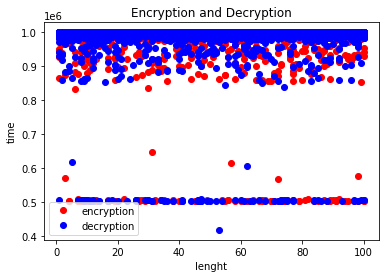

In [138]:
# plotting the data of the dataframe with the lenght and time_enc and time_dec columns on the same graph
plt.plot(l_enc['lenght'], l_enc['time_enc'], 'ro', label='encryption')
plt.plot(l_enc['lenght'], l_enc['time_dec'], 'bo', label='decryption')
plt.xlabel('lenght')
plt.ylabel('time')
plt.title('Encryption and Decryption')
plt.legend()
plt.show()


In [139]:
# save the dataframe to a csv file
l_enc.to_csv('encryption_decryption_time.csv')


In [140]:
# save the dataframe  l to a csv file
l.to_csv('encryption_decryption.csv')

In [141]:
# use the decrypted data to check if the decrypted data is the same as the original data
for index, row in l.iterrows():
    if row['decrypted'] != row['normal']:
        print('error')
        break

In [115]:
# use the encrypted data to replace the original data with the encrypted data
for index, row in l.iterrows():
    with open(row['file_path'], 'wb') as f:
        f.write(row['encrypted'])


In [116]:
# show a random sample of the content of the encrypted files
for file in files[:100]:
    with open(file, 'rb') as f:
        data = f.read()
    print(data)

b'gAAAAABiiOgLPEoAOifNg7-JrZ8iac3uvEVSgm60imm9ZQnGBo2oALuGqtYXi8URswfZxUZrvuPuXcey66iv96AnNhn_pe0AshTj1Vp1N4403yIjTBIh5t89apI-KanU2rX3-0VSCHMhO37y6DL1oVzgJhwrQl1lfBp28hk9gspBmrIKo2r3khPvQz-tGIxC9wYKqVufVNaJ'
b'gAAAAABiiOgLwaR5tQJeXa4a2s7OARzcoXidy3dRDZoTzhgZSFaTqc_3Ztc31vrdK9ehpXWuvaY7NRxdGae8iY_X8B295YIOUZF3Huqncij_TzRbNEbLoVWh_vikmcdXXLGd5VfLJVOgElaQVV3BrQGGGVotgYVOSFwA5znFi2K_fIa3q-9h3EO7OI5dRtwvm2dxY8OVLROz'
b'gAAAAABiiOgLbZVRBdAkJYGnDVSDqswkYz9UmcV6fZOsnoDg60GLcyL-uOCN5uPUlEZ7411UY2S8dCHsD4DhElhqJFviPUUwsBwbVyv3Q1uaAm95ZEYX_aaKhofX6cnp517SE-Gp7ItXDSLD6tyHMIx3YoNXlkEY5ishaoHkzE8AkPJDu3x5puvKfC5lMrfrl1XvBwYhrqtx'
b'gAAAAABiiOgL69wYJQKFtWYjfKyTm0zAePjLjbNPXRK_hDPTsgIVewBGQKihSHf6wa1xmaCn50JWYDh6qZamLdSZ357169rrzu-jpv0FcF1xElOjeClvv9VifSixZuQQH35Av4SK4ICfekKSWAnLu3a_GwCcXiWOZK8fpsNkBkXydXHYe2nL1SPdaHBHqrd0Mhz_Vdw8bvvN'
b'gAAAAABiiOgLGbeCduYcLCHEbCvlhgbGHUo_DNauXRHM7y8nYh1yKys7EgqIjjunpWbmT6LsZ6ZZnyTRz4LsenpPGeV0psaCQRQMqar20zCPldNDxVc2Or-0lDOSusi1Sugv3jIE2wD6fnX6Dp_fZ-jN4DNnps9GPu8z4z

### The next cell writes the decrypted content which was decrypted by a random key, thus finishing the encryption decryption pipeline

In [117]:
# use the decrypted data to replace the original data with the decrypted data
for index, row in l.iterrows():
    with open(row['file_path'], 'wb') as f:
        f.write(row['decrypted'])
        

In [118]:
# show the content of the decrypted files
for file in files[:100]:
    with open(file, 'rb') as f:
        data = f.read()
    print(data)

b'tthittbgjrlzmgrjbzjgdcpdnzmiyusogjbjksfijhspfijlkzszzxgjbdefsbpyutlncmzvtfptlvftearmwghkyekxg'
b'siivvvthcjhiuvfabqxfiwwvrjyfoqyxjoqbtrddreiyrvhxfvpmjronlbvvrkstywphxujrkpjvogqorchgbrdxsbwax'
b'obhzzhqcnjufzutsnmrycwxzdrtiwbjbhzfrmptnqyaticzeeoxvpmutjmjrjhdqsohojedmoptrrgusbivoczfpyhouq'
b'xdpvtravxkikopsarylhebhjuqwtmxxxzwwkmeuvbykmjnavfiyikupkwzfhyyozwzvzbewbxxzdddrakfjlhrvoqxwes'
b'lnlgwkiodewdsvaggkfmrdadawxldxylyzumddudkrqpzqgmzyshdrobooxwfljexlsombevvoynefnytocbisazedlwi'
b'crmjfelinglhdgjoinspelvortbwbejujldejtxpnllheahcjhlxjdgixcgxbfbetfiarskpvpmhkedjymveekfoosabw'
b'duzapepsiwldiqvogychyezyxsiijgbnroeajaqkcwplkkpjuoslfamyokvvwkrabfltgbhzdyvcwdkmullzzdpbtuhkh'
b'zxmswxuu'
b'vxadtyro'
b'wvmtmmoo'
b'xntqlugg'
b'klvdnpxy'
b'alddtlorfocxxasggnlfwbldmjjpitnipmuxbygdbwopkwg'
b'lsnvtvccdcpxajkafolpupkugsmwafnumxzkalmtalugjfa'
b'jdnoklmsbwzkzftyoypmhjzzounmzrkvbeyryhvasfbalty'
b'gmpuhvnaiwvtfkhijmmxifemxtuzpyotqbzmvsspavpdrjq'
b'rtgylrzifpdunofktwjxsgyrcxoyphqibmivgwoajgmrazk'
b'whyo